<h1 align='center'> Introduction to Data Management <br/> Analysis and Security</h1>

## Learning Outcomes
The following learning outcomes apply to this piece:
- **O1** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **O2** - Formulate and extract descriptive and predictive statistics from data
- **O3** - Analyse and interpret results from descriptive and predictive data analysis
- **O4** - Apply their knowledge to a given problem domain and articulate potential data analysis problems

******
# Introduction

Video content is being produced, transported and consumed in more ways and by devices than ever. To facilitate this process, seamless interaction between video producing, transporting and consuming devices is required. The difference in avaliable resources, network bandwidth and video representation types between devices requires a mechanism for video content adaptation and translation. One such mechanism is video transcoding.


### So What is Video Transcoding?

Video transcoding (sometimes refered to as encoding) is the process of converting a video from one digital format to another. A format is defined by characteristics such as:

- Bit rate
- Frame rate
- Spatial resolution
- Coding syntax
- Content

One of the earliest applications of transcoding was to adapt the bit rate of a precompressed video stream to a channel bandwidth. For example, a TV program may be originally compressed at a high bit rate for studio applications, but later needs to be transmitted over a public channel at a much lower bit rate.


### So what are we doing with this?
Transcoding is a computationally demanding process and several methods has been proposed in order to increase its efficiency. Runtime scheduling of transcoding jobs in multicore and cloud environments is hard as resource requirements may not be known before hand. Currently, for video transcoding jobs, one has to rely on worst-case values which lead to an over provisioning of resources. This is due to the fact that the resource requirement of a transcoding job is highly dependent on the video data to be converted and its conversion parameters. In order to allow such distributed and multicore systems to overcome the problem of over provisioning, a method for predicting the resource requirement of each job is required.  If the scheduler can predict accurately how long each job would take to execute on a given platform, it can make an optimal decision, returning results faster, possibly minimizing energy, waiting time and maximizing throughput.


*****
## Data Description
The presented dataset (`transcoding_data.csv`) contains 23 columns which include input and output video characteristics, along with their transcoding time and memory resource requirements, while transcoding videos to different but valid formats. The dataset was collected based on experiments on an Intel i7-3720QM CPU through randomly picking output parameters of a video transcoding application. The attributes present in the dataset and their information are presented in the table below.

| Attribute |             Information            |   Attribute  |                  Information                 |
|:---------:|:----------------------------------:|:------------:|:--------------------------------------------:|
|     `id`    | Youtube Video ID                   |    `frames`    | Total Number of Frames in Video              |
|  `duration` | Duration of video in seconds       |     `size`     | Total Size of Video                          |
|  `bitrate`  | Video Bitrate                      |    `o_codec`   | Output Codec used for Transcoding            |
|   `height`  | Height of video in pixles          |   `o_bitrate`  | Output Bitrate used for Transcoding          |
|   `width`   | Width of video in pixels           |  `o_framerate` | Output Framerate used for Transcoding        |
| `framerate` | Number of Frames per Second        |    `o_width`   | Output Width in pixel used for Transcoding   |
|   `codec`   | Coding standard used for the video |   `o_height`   | Output Height used in pixel for Transcoding  |
|     `i`     | number of i frames in the video    | `o_resolution` | Output Resolution used for Transcoding       |
|     `p`     | number of p frames in the video    |     `umem`     | Total Codec Allocated Memory for Transcoding |
|     `b`     | number of b frames in the video    |     `utime`    | Total Process Time for Transcoding           |

****

In [1]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules. However, we had added space here just in case you feel 
# extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.

from sklearn.linear_model import LinearRegression       # linear regression
from sklearn.model_selection import train_test_split    # train-test split
from sklearn import metrics

****
## 1. Loading and Processing the Data
The first step in any data analysis and visualisation is to load the data and make it usable. Note how there are various columns that use text categories, and some categories missing data altogether. It would be wise to prepare the data to make it easier to work on.

**HINTS** -
* You might want to change the datatype of some columns to make them more useful from an analysis point-of-view.
* You might need to drop unnecessary or rededundant columns.
* You might need to rename some columns.

<span style= 'float: right;'></span>

In [3]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

# import data 
df = pd.read_csv("./transcoding_data.csv", index_col=0)

# 1. Check the data types
print("Check the data types")
print(df.dtypes)
print("")

# 2. Drop the irrelevent columns
df.drop(['url'], axis=1, inplace=True)

# 3. Add new column 'v_resolution' (v_resolution = width * height)
df['v_resolution'] = df['width']*df['height']
df['ov_resolution'] = df['o_width']*df['o_height']

# 4. Ordinal variable 
codecTranscode = {'mpeg4':1, 'h264':2, 'flv1':3, 'vp8':4}
o_codecTranscode = {'mpeg4':1, 'h264':2, 'flv1':3}
df['codecTranscode'] = df['codec'].map(codecTranscode)
df['o_codecTranscode'] = df['o_codec'].map(o_codecTranscode)

# 5. Check whether rows containing duplicate data or not
duplicate_rows_df = df[df.duplicated()]
print("The number of duplicate rows is", duplicate_rows_df.shape[0])
print("")

# 6. Detect the missing or null data 
print("Detect the missing or null data")
print(df.isnull().sum())
print("")

df.head()

Check the data types
duration          int64
codec            object
bitrate           int64
width             int64
height            int64
resolution       object
framerate       float64
frames          float64
i                 int64
p                 int64
b                 int64
size            float64
category         object
url              object
o_codec          object
o_bitrate         int64
o_framerate     float64
o_width           int64
o_height          int64
o_resolution     object
umem            float64
utime           float64
dtype: object

The number of duplicate rows is 0

Detect the missing or null data
duration            0
codec               0
bitrate             0
width               0
height              0
resolution          0
framerate           0
frames              0
i                   0
p                   0
b                   0
size                0
category            0
o_codec             0
o_bitrate           0
o_framerate         0
o_width          

,duration,codec,bitrate,width,height,resolution,framerate,frames,i,p,...,o_framerate,o_width,o_height,o_resolution,umem,utime,v_resolution,ov_resolution,codecTranscode,o_codecTranscode
id,,,,,,,,,,,,,,,,,,,,,
uDNj-_5ty48,267,h264,373,568,320,568x320,29.97,8001.99,102,7858,...,15.00,480,360,480x360,172247.935215,166.415727,181760,172800,2,1
uDNj-_5ty48,267,flv1,324,400,226,400x226,29.97,8001.99,130,7816,...,12.00,320,240,320x240,115355.838797,51.035704,90400,76800,3,3
uDNj-_5ty48,267,mpeg4,85,176,144,176x144,12.00,3204.00,43,3146,...,24.00,640,480,640x480,37827.340566,173.629478,25344,307200,1,3
WCgt-AactyY,31,h264,1261,640,480,640x480,24.00,744.00,58,714,...,24.00,640,480,640x480,110002.908561,150.693204,307200,307200,2,1
WCgt-AactyY,31,flv1,370,320,240,320x240,24.00,744.00,61,674,...,29.97,1920,1080,1920x1080,77903.861755,278.413210,76800,2073600,3,3


In [4]:
# 7. Identify the categorical variables and get the codec types, o_codec types, o_resolution types, and category types
codecTypes = list(df['codec'].value_counts().keys())
o_codecTypes = list(df['o_codec'].value_counts().keys())
o_resolutionTypes = list(df['o_resolution'].value_counts().keys())
categories = list(df['category'].value_counts().keys())

print("codec types:", codecTypes)
print("o_codec types:", o_codecTypes)
print("o_resolution types:", o_resolutionTypes)
print("category types:", categories)

codec types: ['mpeg4', 'h264', 'vp8', 'flv1']
o_codec types: ['h264', 'flv1', 'mpeg4']
o_resolution types: ['480x360', '176x144', '320x240', '640x480', '1280x720', '1920x1080']
category types: ['Gaming', 'People & Blogs', 'Entertainment', 'Music', 'Education', 'News & Politics', 'Sports', 'Film & Animation', 'Comedy', 'Science & Technology', 'Nonprofits & Activis', 'Howto & Style', 'Autos & Vehicles', 'Travel & Events', 'Pets & Animals', 'Shows']


******
## 2. Exploratory Data Analysis

In this section you are expected to do an exploratory data analysis (EDA) on the dataset that you've just loaded and readied. EDA involves looking into any interesting features within the dataset. This could come in the form of relationships, anomalies or statistical trends. You are encouraged to start with a broad overview of the data and focus on specific aspects that seem like they could be of interest, even if they aren't! We want to see your process of data exploration using both **statistical** and **visual** methods here.

**HINTS** -

* If you have multiple graphs they should all be outputted as subplots under a single cell instead of each under their own cells. 
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.


<span style= 'float: right;'></span>

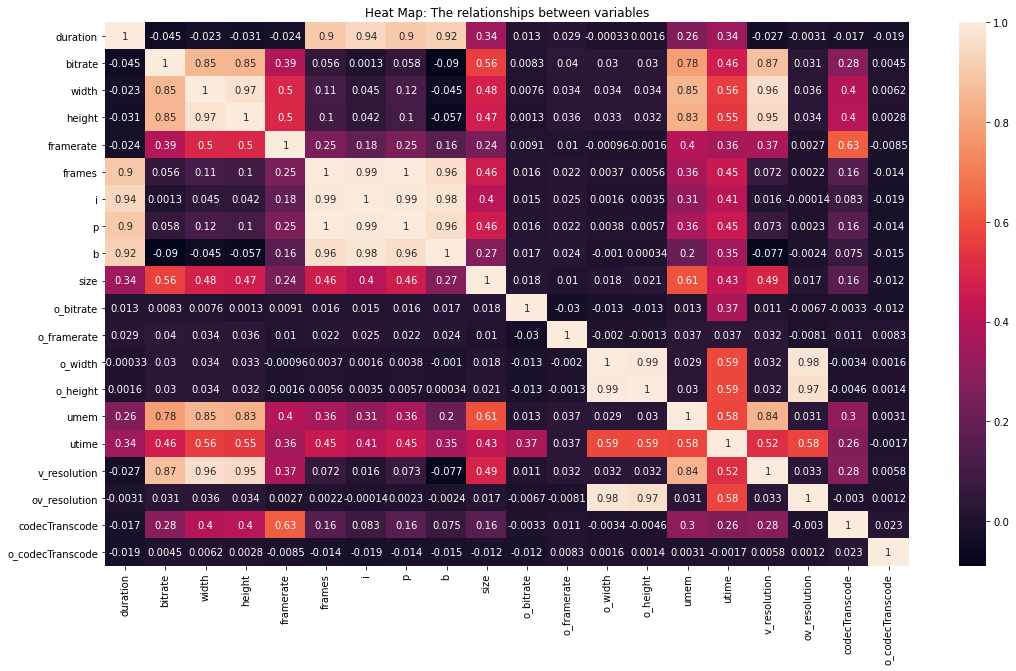

In [5]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

# 1. Find the relationships between variables 
plt.figure(figsize=(18,10))

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)

plt.title("Heat Map: The relationships between variables")
plt.show()

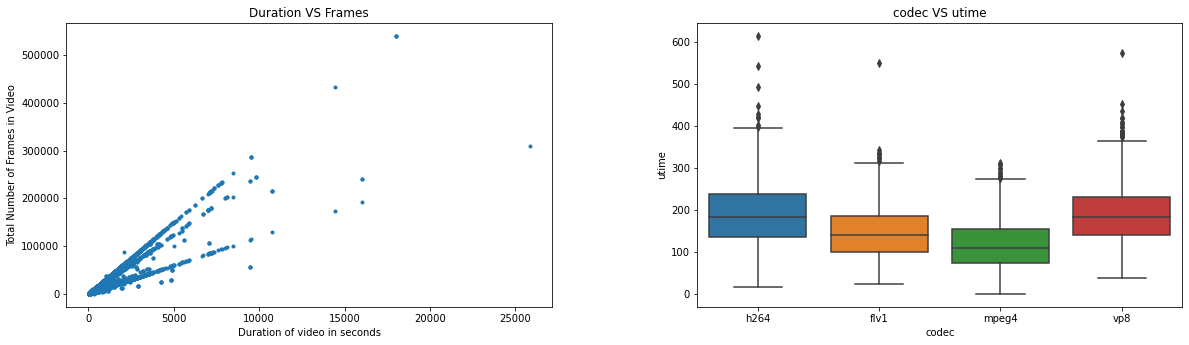

In [6]:
# 2. Plot graphs 
fig = plt.figure(figsize=(20,12))    # changes the output plotting size
fig.subplots_adjust(wspace=0.3, hspace=0.3)    # increases the distance between subplots

# 1) scatter plot - Duration VS Frames
ax1 = fig.add_subplot(221)

ax1.scatter(df['duration'], df['frames'], marker=".")
ax1.set_xlabel("Duration of video in seconds")
ax1.set_ylabel("Total Number of Frames in Video")
ax1.set_title("Duration VS Frames")

# 2) Plot side-by-side boxplot
ax2 = fig.add_subplot(222)

ax2 = sns.boxplot(x=df['codec'], y=df['utime'])
ax2.set_title("codec VS utime")

plt.show()

Initial Idea: Before looking into any interesting features, generate a Heat Maps to find the relations between the variables. A high correlation coefficient may imply some relationships among variables. To illustrate, we can construct various plot such as scatter plot, boxplot and so on to explore more features and do data analysis. 

Output Analysis
1) It is necessary to construct a Heat Maps plot when we find the dependent variables. From the heat maps plot above, we can find that there exists a strong and positive linear relathionship between duration and frames, becuase the correlation coefficient between these two variables are 0.9 which is much greater than 0.5.

2) To further support the above statement, a scatter plot for duration and frames is constructed. With the increase of duration of video, total number of frames in a video rises. We can see there is a positive linear relationship between them, and some outliers exist. 

3) In the side-by-side boxplot, it can be seen that videos with mpeg4 codec transcode has smallest mean value of total process time for transcoding, and outliers exist. 

# Reference 
[1] Prabhu, T. N. (2019, August 11). Exploratory data analysis in Python. - Towards Data Science. Medium. https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce

[2] seaborn.boxplot — seaborn 0.11.1 documentation. (n.d.). Seaborn.Pydata.Org. Retrieved April 4, 2021, from https://seaborn.pydata.org/generated/seaborn.boxplot.html

******
## Q3. Optimal Settings for Video Transcoding
In this section, you will be provided a question or statement that are you required to prove/disprove. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. You are also expected to provide code and written answers as required. Marks will be allocated based on the depth of your answer.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

<span style= 'float: right;'></span>

### 3.1. Is there a relationship between the transcoding parameters and the characteristics of the input video?

Note: The transcoding parameters mentioned here are **[o_codec, o_bitrate, o_framerate, o_resolution]** and the characteristics are **[duration, codec, bitrate, width, height, framerate, frames, i, p, b, size]** respectively.

<span style= 'float: right;'></span>

In [7]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

From the heat map graph, all correlation coefficients (Pearson correlation) between the transcoding parameters and the characteristics of the input video are much smaller than 0.5, so there is no linear relationship between them. 

### 3.2. What are best settings to apply to the transcoding parameters so as to minimise the memory consumed by the transcoding process?

Note: The transcoding parameters mentioned here are **[o_codec, o_bitrate, o_framerate, o_resolution]**.

<span style= 'float: right;'></span>

In [8]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

# Get the minimum memory consumed by the transcoding process 
miniUmem = df['umem'].min()
bestSetting = df[df['umem'] == miniUmem]

besto_codec = bestSetting['o_codecTranscode'][0]
print("Best setting to apply to the o_codec is ", list(o_codecTranscode.keys())[besto_codec-1])
besto_bitrate = bestSetting['o_bitrate'][0]
print("Best setting to apply to the o_bitrate is ", besto_bitrate)
besto_framerate = bestSetting['o_framerate'][0]
print("Best setting to apply to the o_framerate is ", besto_framerate)
besto_resolution = bestSetting['o_resolution'][0]
print("Best setting to apply to the o_resolution is ", besto_resolution)

Best setting to apply to the o_codec is  flv1
Best setting to apply to the o_bitrate is  3000000
Best setting to apply to the o_framerate is  15.0
Best setting to apply to the o_resolution is  480x360


Initial Idea: Firstly, find the minimum value of the memory consumed by the transcoding process (i.e. 'umem'), then find its corresponding transcoding parameters.

Result Analysis: From the output above, the best settings to apply to the transcoding parameters (o_codec, o_bitrate, o_framerate, o_resolution) are 'flv1', '3000000', '15.0' and '480x360' respectively. 

### 3.3. Which transcoding parameters have the greatest impact on Process Time for Transcoding (`utime`)? List them in descending order of effect (most to least).
<span style= 'float: right;'></span>

In [9]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

o_codecR, o_codecP = stats.spearmanr(df['o_codecTranscode'], df['utime'])        # Rank 4
o_bitrateR, o_bitrateP = stats.spearmanr(df['o_bitrate'], df['utime'])           # Rank 1
o_framerateR, o_framerateP = stats.spearmanr(df['o_framerate'], df['utime'])     # Rank 3
o_resolutionR, o_resolutionP = stats.spearmanr(df['o_resolution'], df['utime'])  # Rank 2

lst = [("o_codec", abs(o_codecR)), ("o_bitrate", abs(o_bitrateR)), ("o_framerate", abs(o_framerateR)), ("o_resolution", abs(o_resolutionR))]
lst.sort(key=lambda x:x[1])
lst.reverse()

print("The impact on utime in descending order of effect is", lst[0][0]+",", lst[1][0]+",", lst[2][0]+", and", lst[3][0]+".")
print("")
print("The correlation coefficient of o_bitrate is", o_bitrateR, "and its p-value is", o_bitrateP)
print("The correlation coefficient of o_resolution is", o_resolutionR, "and its p-value is", o_resolutionP)
print("The correlation coefficient of o_framerate is", o_framerateR, "and its p-value is", o_framerateP)
print("The correlation coefficient of o_codec is", o_codecR, "and its p-value is", o_codecP)

The impact on utime in descending order of effect is o_bitrate, o_resolution, o_framerate, and o_codec.

The correlation coefficient of o_bitrate is 0.31027992390751014 and its p-value is 1.3154824295174653e-109
The correlation coefficient of o_resolution is -0.16199854510175554 and its p-value is 4.1426510341171325e-30
The correlation coefficient of o_framerate is 0.03736868994116173 and its p-value is 0.008965092731275536
The correlation coefficient of o_codec is -0.0018335151777735615 and its p-value is 0.8980046601679719


Based on the absolute value of the correlation coefficient, the effect on process time for transcoding ('utime') in descending order is o_bitrate, o_resolution, o_framerate, and o_codec.

### 3.4. Does the difference in the video's input and output resolution affect the Process Time for Transcoding (`utime`)? How does this resolution difference vary (if at all) in relation to the Output Resolution used for Transcoding (`o_resolution`)?

Correlation coefficient is 0.5403703558776445 and its p-value is 0.0


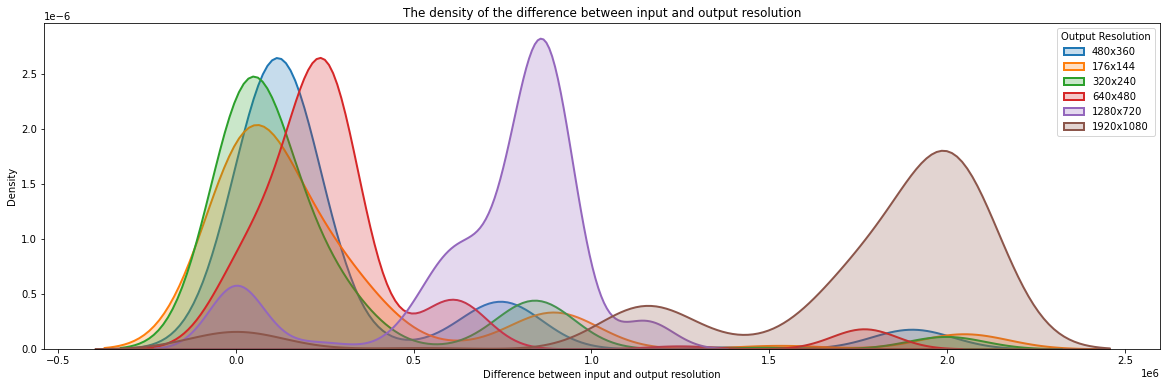

In [10]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

# changing the settings of the output
fig = plt.figure(figsize=(20,6))    
fig.subplots_adjust(wspace=0.3, hspace=0.3)    

diff = abs((df['ov_resolution']-df['v_resolution']).values)
corr_coef = stats.pearsonr(diff, df['utime'].values)
print("Correlation coefficient is", corr_coef[0], "and its p-value is", corr_coef[1])

for o_resolType in o_resolutionTypes:
    subset = df[df['o_resolution'] == o_resolType]
    # Draw the density plot
    sns.distplot((abs(subset['ov_resolution']-subset['v_resolution']).values), hist=False, kde=True,
                kde_kws={'shade': True,'linewidth': 2}, label=o_resolType)

# Plot formatting
plt.title("The density of the difference between input and output resolution")
plt.xlabel("Difference between input and output resolution")
plt.ylabel("Density")
plt.legend(title = 'Output Resolution')

plt.show()

Initial Idea: Firstly, convert the categorical variable resolution into numerical variable in order to simplify analysis. Calculate the difference in the video's input and output resolution by using the formula absolute value of [ov_resolution (o_width * o_height) minus v_resolution (width * height)]. After that, calculate the correlation coefficient between the difference and the process time for transcoding, and draw a density distribution of the difference for each type of the output resolution to do the analysis.

Result Analysis 
1) The person correlation coefficient between the difference in the video's input and output resolution and the process time for transcoding (utime) is around 0.54, and it has p-value 0 which is smaller than the significant level 0.05. Hence, even though the effect is small, the difference affects the 'utime' to some extent. 

2) As can be seen in the above graph, there are six output resolution types, and for each type the resolution can become smaller or larger than the input resolution. With the increase of the output resolution, the mean of the difference between input and output resolution rises. 

# Reference 
Koehrsen, W. (2018, July 7). Histograms and Density Plots in Python - Towards Data Science. Medium. https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

******
## 4. Data Analysis
In this section, you will be provided a question or statement that are you required to prove/disprove. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. You are also expected to provide code and written answers as required. Marks will be allocated based on the depth of your answer.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

### 4.1. Is there a relationship between the total number of frames in a video and the transcoding time for a given output resolution and codec?

Note there are a number of ways in which this can be done. However, due to the number of parameters available in the dataset, you can restrict the options for analysis (with justification), in order to reduce computational complexity.

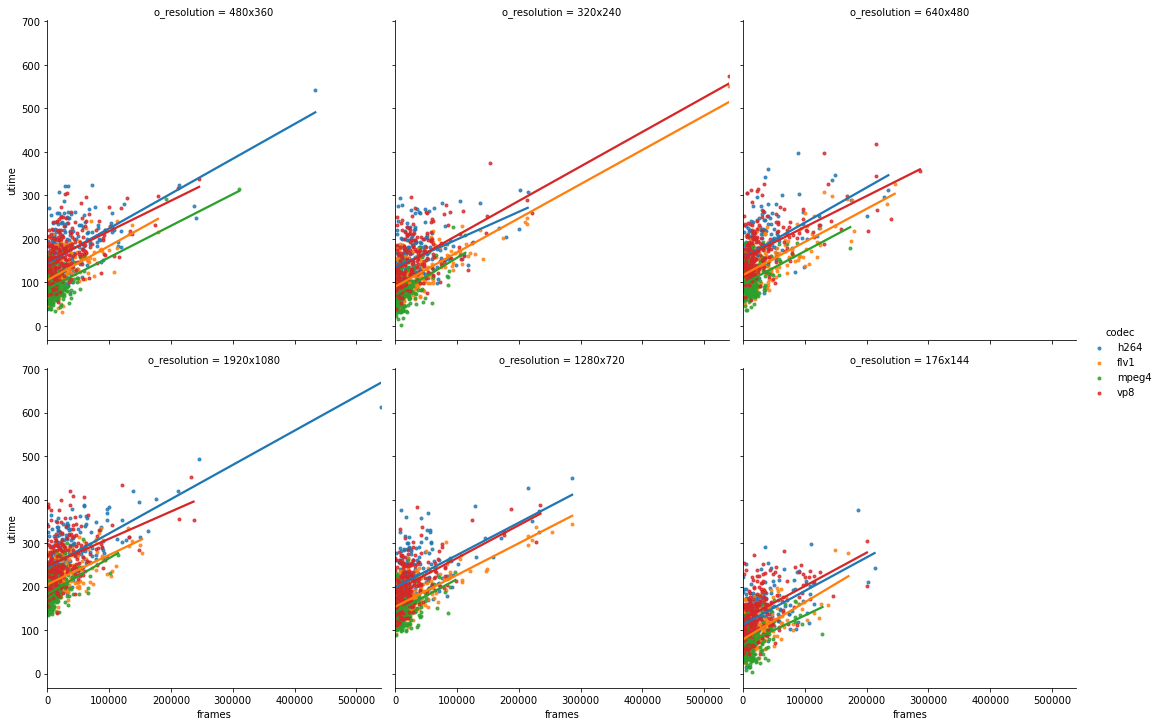

In [11]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)  

sns.lmplot(data=df, x="frames", y="utime", hue="codec", 
            col="o_resolution", col_wrap=3, ci=None, markers=".")
plt.show()

Initial Idea: To find a relationship between the total number of frames in a video ('frames') and the transcoding time ('utime') for a given output resolution ('o_resolution') and codec ('codec'), draw six scatter plots to see whether there exists a linear relationship or not. Differentiate these points on the scatterplot based on their 'o_resolution' and 'codec', and distinguish them by colour. 

Result Analysis: Given the output resolution and codec, there is a positive linear relationship between the total number of frames in a video (i.e. 'frames') and the transcoding time (i.e. 'utime').

# Reference 
seaborn.lmplot — seaborn 0.11.1 documentation. (n.d.). Seaborn.Pydata.Org. Retrieved April 4, 2021, from https://seaborn.pydata.org/generated/seaborn.lmplot.html

### 4.2. How does the resolution (width & height) of a video in the top 5 video categories vary with respect to the codec used and video category?

In [12]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

# Helper function 
# Given the list of Keys and Values of the resolution (i.e. key = width*height), return the resolution type (SD, HD, Full HD)

def pixelSize(lstKeys, lstValues):
    level1 = []  # for key <= 640*480, lower resolution (SD)
    level2 = []  # for 640*480 < key <= 720 * 480, medium resolution (HD)
    level3 = []  # for 720 * 480 < key <= 1920 * 1080, high resolution (Full HD)
    low_frequency = 0
    mid_frequency = 0
    high_frequency = 0
    
    for key, value in zip(lstKeys, lstValues):
        if key <= 640*480:
            level1.append(key)
            low_frequency+=value
        elif (640*480 < key) & (key <= 720 * 480):
            level2.append(key)
            mid_frequency+=value
        else:
            level3.append(key)
            high_frequency+=value

    return list((low_frequency, mid_frequency, high_frequency))

# Given the category(e.g. "Gaming"), and return the list of the resolution level proportion 
def getLstLevels(category):
    h264 = category[category["codec"] == "h264"] # codec="h264" & category="Gaming"
    h264Keys = list((h264["width"]*h264["height"]).value_counts().keys())
    h264Values = list((h264["width"]*h264["height"]).value_counts().values)
    h264level1_frequency = pixelSize(h264Keys, h264Values)[0]
    h264level2_frequency = pixelSize(h264Keys, h264Values)[1]
    h264level3_frequency = pixelSize(h264Keys, h264Values)[2]
    h264total = h264level1_frequency + h264level2_frequency + h264level3_frequency

    vp8 = category[category["codec"] == "vp8"] # codec="vp8" & category="Gaming"
    vp8Keys = list((vp8["width"]*vp8["height"]).value_counts().keys())
    vp8Values = list((vp8["width"]*vp8["height"]).value_counts().values)
    vp8level1_frequency = pixelSize(vp8Keys, vp8Values)[0]
    vp8level2_frequency = pixelSize(vp8Keys, vp8Values)[1]
    vp8level3_frequency = pixelSize(vp8Keys, vp8Values)[2]
    vp8total = vp8level1_frequency + vp8level2_frequency + vp8level3_frequency
    
    flv1 = category[category["codec"] == "flv1"] # codec="flv1" & category="Gaming"
    flv1Keys = list((flv1["width"]*flv1["height"]).value_counts().keys())
    flv1Values = list((flv1["width"]*flv1["height"]).value_counts().values)
    flv1level1_frequency = pixelSize(flv1Keys, flv1Values)[0]
    flv1level2_frequency = pixelSize(flv1Keys, flv1Values)[1]
    flv1level3_frequency = pixelSize(flv1Keys, flv1Values)[2]
    flv1total = flv1level1_frequency + flv1level2_frequency + flv1level3_frequency

    mpeg4 = category[category["codec"] == "mpeg4"] # codec="mpeg4" & category="Gaming"
    mpeg4Keys = list((mpeg4["width"]*mpeg4["height"]).value_counts().keys())
    mpeg4Values = list((mpeg4["width"]*mpeg4["height"]).value_counts().values)
    mpeg4level1_frequency = pixelSize(mpeg4Keys, mpeg4Values)[0]
    mpeg4level2_frequency = pixelSize(mpeg4Keys, mpeg4Values)[1]
    mpeg4level3_frequency = pixelSize(mpeg4Keys, mpeg4Values)[2]
    mpeg4total = mpeg4level1_frequency + mpeg4level2_frequency + mpeg4level3_frequency

    level1Prop = [(h264level1_frequency/h264total), (vp8level1_frequency/vp8total), (flv1level1_frequency/flv1total), (mpeg4level1_frequency/mpeg4total)]
    level2Prop = [(h264level2_frequency/h264total), (vp8level2_frequency/vp8total), (flv1level2_frequency/flv1total), (mpeg4level2_frequency/mpeg4total)]
    level3Prop = [(h264level3_frequency/h264total), (vp8level3_frequency/vp8total), (flv1level3_frequency/flv1total), (mpeg4level3_frequency/mpeg4total)]
    
    return list((level1Prop, level2Prop, level3Prop))

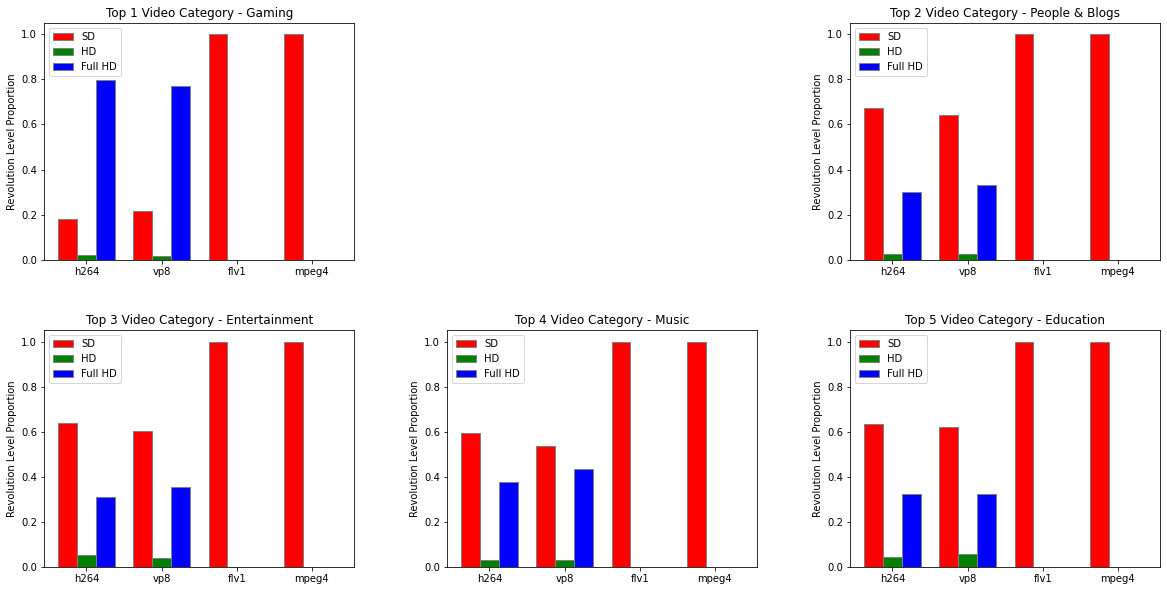

In [13]:
# Top1: Gaming Top2: People & Blogs Top3: Entertainment Top4: Music Top5: Education 

fig = plt.figure(figsize=(20,10)) 
fig.subplots_adjust(wspace=0.3, hspace=0.3) 
barWidth = 0.25
codec_label = ["h264", "vp8", "flv1", "mpeg4"]

categories_list = df["category"].value_counts().keys().tolist() # get all categories in descending order

# Plot the resolution vs Gaming & codec used 
ax1 = fig.add_subplot(231)

top1_gaming = df[df["category"] == categories_list[0]] # the top 1 video category: Gaming 
top1_level1 = getLstLevels(top1_gaming)[0]
top1_level2 = getLstLevels(top1_gaming)[1]
top1_level3 = getLstLevels(top1_gaming)[2]

level1Bar1 = np.arange(4) # set position of bar on X axis 
level2Bar2 = [x + barWidth for x in level1Bar1]
level3Bar3 = [x + barWidth for x in level2Bar2]

plt.bar(level1Bar1, top1_level1, color='r', width=barWidth, edgecolor='grey', label='SD')
plt.bar(level2Bar2, top1_level2, color='g', width=barWidth, edgecolor='grey', label='HD')  
plt.bar(level3Bar3, top1_level3, color='b', width=barWidth, edgecolor='grey', label='Full HD')

ax1.set_title("Top 1 Video Category - Gaming")
ax1.set_ylabel("Revolution Level Proportion")
plt.xticks([r + barWidth for r in range(4)], codec_label) 
ax1.legend()

# Plot the resolution vs People & Blogs & codec used 
ax2 = fig.add_subplot(233)

top2_pb = df[df["category"] == categories_list[1]] # the top 2 video category: People & Blogs 
top2_level1 = getLstLevels(top2_pb)[0]
top2_level2 = getLstLevels(top2_pb)[1]
top2_level3 = getLstLevels(top2_pb)[2]

plt.bar(level1Bar1, top2_level1, color='r', width=barWidth, edgecolor='grey', label='SD')
plt.bar(level2Bar2, top2_level2, color='g', width=barWidth, edgecolor='grey', label='HD')  
plt.bar(level3Bar3, top2_level3, color='b', width=barWidth, edgecolor='grey', label='Full HD')

ax2.set_title("Top 2 Video Category - People & Blogs")
ax2.set_ylabel("Revolution Level Proportion")
plt.xticks([r + barWidth for r in range(4)], codec_label) 
ax2.legend()

# Plot the resolution vs Entertainment & codec used 
ax3 = fig.add_subplot(234)
top3_entertainment = df[df["category"] == categories_list[2]] # the top 3 video category: Entertainment
top3_level1 = getLstLevels(top3_entertainment)[0]
top3_level2 = getLstLevels(top3_entertainment)[1]
top3_level3 = getLstLevels(top3_entertainment)[2]

plt.bar(level1Bar1, top3_level1, color='r', width=barWidth, edgecolor='grey', label='SD')
plt.bar(level2Bar2, top3_level2, color='g', width=barWidth, edgecolor='grey', label='HD')  
plt.bar(level3Bar3, top3_level3, color='b', width=barWidth, edgecolor='grey', label='Full HD')

ax3.set_title("Top 3 Video Category - Entertainment")
ax3.set_ylabel("Revolution Level Proportion")
plt.xticks([r + barWidth for r in range(4)], codec_label) 
ax3.legend()

# Plot the resolution vs Music & codec used 
ax4 = fig.add_subplot(235)
top4_music = df[df["category"] == categories_list[3]] # the top 4 video category: Music
top4_level1 = getLstLevels(top4_music)[0]
top4_level2 = getLstLevels(top4_music)[1]
top4_level3 = getLstLevels(top4_music)[2]

plt.bar(level1Bar1, top4_level1, color='r', width=barWidth, edgecolor='grey', label='SD')
plt.bar(level2Bar2, top4_level2, color='g', width=barWidth, edgecolor='grey', label='HD')  
plt.bar(level3Bar3, top4_level3, color='b', width=barWidth, edgecolor='grey', label='Full HD')

ax4.set_title("Top 4 Video Category - Music")
ax4.set_ylabel("Revolution Level Proportion")
plt.xticks([r + barWidth for r in range(4)], codec_label) 
ax4.legend()

# Plot the resolution vs Education & codec used 
ax5 = fig.add_subplot(236)
top5_education = df[df["category"] == categories_list[4]] # the top 5 video category: Education
top5_level1 = getLstLevels(top5_education)[0]
top5_level2 = getLstLevels(top5_education)[1]
top5_level3 = getLstLevels(top5_education)[2]

plt.bar(level1Bar1, top5_level1, color='r', width=barWidth, edgecolor='grey', label='SD')
plt.bar(level2Bar2, top5_level2, color='g', width=barWidth, edgecolor='grey', label='HD')  
plt.bar(level3Bar3, top5_level3, color='b', width=barWidth, edgecolor='grey', label='Full HD')

ax5.set_title("Top 5 Video Category - Education")
ax5.set_ylabel("Revolution Level Proportion")
plt.xticks([r + barWidth for r in range(4)], codec_label) 
ax5.legend()

plt.show()

Initial Idea: In order to find how the resolution (width & height) of a video in the top 5 video categories vary with respect to the codec used (i.e. 'codec') and video category, firstly divide the resolution into three types - Standard Definition Resolution ('SD'), High Definition Resolution ('HD') and Full HD Resolution ('Full HD') according to the resolution value ('v_resolution = width * height') to make analysis simple. The higher the resolution, the clearer a video will be. Then figure out how the resolution varies. 

Result Analysis: From the bar charts above, it can be seen that videos with flv1 and mpeg4 codec transcode have low resolution no matter what category the video has. Compared with other category videos, gaming video has the highest Full HD resolution proportion and lowest SD as well as HD resolution proportion in both h264 and vp8 codec transcode. Besides, a similar distribution can be found in the other four video category (People & Blogs, Entertainment, Music, Education). 

In conclusion, videos with flv1 and mpeg4 codec transcode have low resolution. While for gaming videos with h264 and vp8 codec transcode, it usually requires high resolution to display. 

# Reference
Surana, N. (2020, November 27). A Complete List of Video Resolutions and their Pixel Size. Typito. https://blog.typito.com/video-resolutions/

### 4.3. Do videos with `flv1` codec transcode much faster than those with `h264` codec? Analyse the provided dataset and explain your findings.

**Hint:** A Hypothesis Test is a good way to assess a statement.

In [14]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

flv1 = df[df["codec"] == "flv1"]
flv1_utime = flv1["utime"]

h264 = df[df["codec"] == "h264"]
h264_utime = h264["utime"]

t,p = stats.ttest_ind(flv1_utime, h264_utime)
print("t-test:", t, "p-value:", p/2)

t-test: -15.700582266720046 p-value: 2.6983141544367716e-53


H0: Videos with flv1 codec transcode are not much faster than those with h264 codec. (i.e. flv1_utime >= h264_utime)
HA: Videos with flv1 codec transcode are faster than those with h264 codec. (i.e. flv1_utime < h264_utime)

As can be seen in the above result, p-value is much smaller than the significant level (i.e. 5%), so we have enough evidence to reject the null hypothesis test. Hence, we can conclude that videos with flv1 codec transcode are faster than those with h264 codec.

# Reference 
How to perform two-sample one-tailed t-test with numpy/scipy. (2013, April 13). Stack Overflow. https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy 

### 4.4. This dataset is full of subtleties. Find two implicit relationships (not covered above) in the dataset and discuss how they could be used to better help with building a model to predict transcoding time and memory.
**Note:** Implicit is defined as "capable of being understood from something else though unexpressed" ([reference](https://www.merriam-webster.com/dictionary/implicit)).

**Hint:** Removing outliers makes it easier to detect implicit relations.

The proportion of 'i' column is 0.013732786458286546
The proportion of 'p' column is 0.9822547791061434
The proportion of 'b' column is 0.004012434435570002

The equation: frames = framerate * duration is True
The equation: size = duration * bitrate * framerate is True


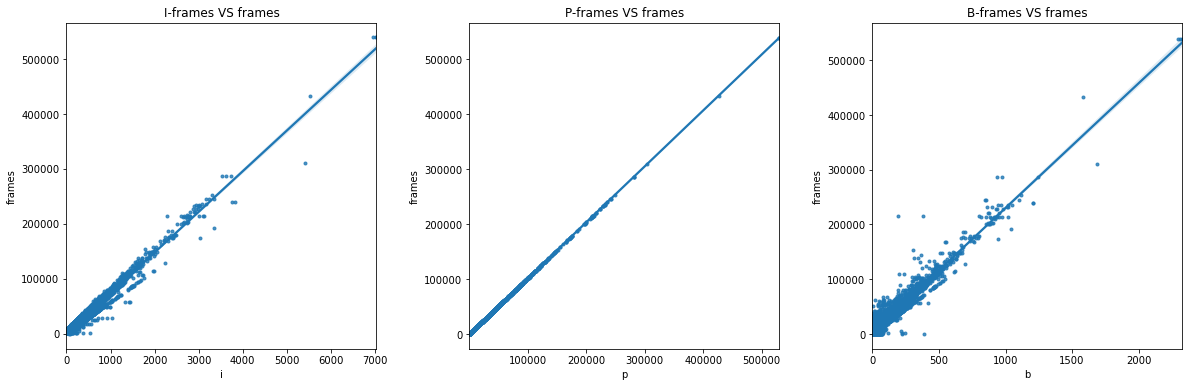

In [15]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

# The first implicit relationship
iSum = sum(list(df['i'].values)) # the sum of 'i' column value
pSum = sum(list(df['p'].values))
bSum = sum(list(df['b'].values))

iProp = iSum/(iSum+pSum+bSum)
pProp = pSum/(iSum+pSum+bSum)
bProp = bSum/(iSum+pSum+bSum)
print("The proportion of 'i' column is", iProp)
print("The proportion of 'p' column is", pProp)
print("The proportion of 'b' column is", bProp)
print("")

fig = plt.figure(figsize=(20,6))    
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(131)
sns.regplot(x='i', y='frames', data=df, marker=".")
ax1.set_title("I-frames VS frames")
ax2 = fig.add_subplot(132)
sns.regplot(x='p', y='frames', data=df, marker=".")
ax2.set_title("P-frames VS frames")
ax3 = fig.add_subplot(133)
sns.regplot(x='b', y='frames', data=df, marker=".")
ax3.set_title("B-frames VS frames")

# The second implicit relationship: frames = framerate * duration & size = duration * bitrate * framerate
lstOfBool = list(round(df['frames']).values == (round(df['duration']*df['framerate'])).values)
lstOfBool2 = list(round(df['size']).values == (round(df['duration']*df['bitrate']*df['framerate'])).values)
print("The equation: frames = framerate * duration is" ,lstOfBool.count(lstOfBool[0]) == len(lstOfBool))
print("The equation: size = duration * bitrate * framerate is" ,lstOfBool2.count(lstOfBool2[0]) == len(lstOfBool2))

Initial Idea: Since we have many variables inclouding categorical and numerical variable in this database, we will have many combinations of constructing the prediction model. It is inefficent to use all variables as predictors, so we can analyze the main features and use them to build our model. By doing this process, it may reduce the complexity of model building to some extent.

Result Analysis:
1) Analyze the first implicit relationship
According to the Wikipedia, there are three main types of frames used in video compression, which are i-frames, p-frames and b-frames respectively. From the output above, p-frames takes the largest proportion with the number of approximately 98%. Besides, it can be seen that p-frames has the strongest linear relationship with respect to the 'frames' compared to i-frames and b-frames. Therefore, when we construct a model to predict transcoding time and memory, we can take p-frames variable as main consideration instead of taking i-frames/b-frames or all of them. (i.e. Only use p-frames variable as one of independent variables in the prediction model to represent the this kind of effect to transcoding time and memory.) 

2) Analyze the second implicit relationship
Through calculations we can find that two equations (frames = framerate * duration and size = duration * bitrate * framerate), which may demonstrate these variables (i.e. 'frames', 'framerate', 'duration', 'size' and 'bitrate') are related with each other to some extent. Thus, when we build the prediction model to predict transcoding time and memory, we can consider to use 'duration', 'bitrate' and 'framerate' as predictors rather than using these 5 variables to reduce complexity of building prediction model. 

# Reference 
Wikipedia contributors. (2020, December 15). Video compression picture types. Wikipedia. https://en.wikipedia.org/wiki/Video_compression_picture_types

*****
## 5. Linear Regression
Make use of the provided dataset to build a transcoding time prediction model and show the significance of the provided datasets.

Your task is as follows:
- Using a Linear Regression model, show how it could be possible (or impossible) to predict memory and cpu resources based on the variables provided in the dataset.

You are able to choose any variables in the dataset, except of course the base scores themselves. This means you can try to use indicators to predict the memory and cpu resources, or vice versa. After running your experiment, provide a written answer highlighting your results and the outcome of your work.

Enter your Response and Predictors here (for marker simplicity)
Response: 'utime', 'umem'
Predictors: 'p', 'duration', 'bitrate', 'framerate', 'v_resolution', 'ov_resolution'

Model 1: build a transcoding time prediction model

The intercept of transcoding time prediction model is 62.57249292529811
               Coefficient
p                 0.000744
duration          0.000997
bitrate           0.000556
framerate         0.959383
v_resolution      0.000065
ov_resolution     0.000056
The test score (R^2) of transcoding time prediction model is 0.7578850042347292
The MSE of transcoding time prediction model is 1275.400267397592

Model 2: build a memory consumed prediction model

The intercept of memory consumed prediction model is 15467.52901475798
               Coefficient
p                 0.973475
duration         15.478192
bitrate          35.706487
framerate      1064.892198
v_resolution      0.254274
ov_resolution     0.000499
The test score (R^2) of memory consumed prediction model is 0.8169913145366662
The MSE of memory consumed prediction model is 7571458215.823984


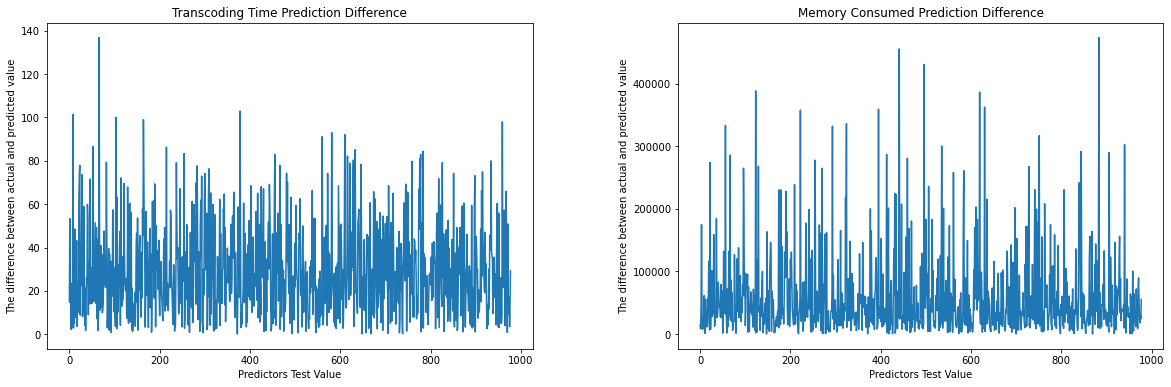

In [16]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

fig = plt.figure(figsize=(20,6)) 
fig.subplots_adjust(wspace=0.3, hspace=0.3)

X = df[['p', 'duration', 'bitrate', 'framerate', 'v_resolution', 'ov_resolution']]
Y = df[['utime', 'umem']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
lr = LinearRegression()
lr1 = LinearRegression()
lr2 = LinearRegression()
model = lr.fit(X_train, Y_train)

print("Model 1: build a transcoding time prediction model")
print("")
print("The intercept of transcoding time prediction model is", model.intercept_[0])
utimeModel_coeff_df = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(utimeModel_coeff_df)
utimeModel = lr1.fit(X_train, Y_train['utime'])
print("The test score (R^2) of transcoding time prediction model is", utimeModel.score(X_test, Y_test['utime']))
print("The MSE of transcoding time prediction model is", metrics.mean_squared_error(Y_test['utime'], model.predict(X_test)[:, 0]))
print("")

print("Model 2: build a memory consumed prediction model")
print("")
print("The intercept of memory consumed prediction model is", model.intercept_[1])
umemModel_coeff_df = pd.DataFrame(model.coef_[1], X.columns, columns=['Coefficient'])
print(umemModel_coeff_df)
umemModel = lr2.fit(X_train, Y_train['umem'])
print("The test score (R^2) of memory consumed prediction model is", umemModel.score(X_test, Y_test['umem']))
print("The MSE of memory consumed prediction model is", metrics.mean_squared_error(Y_test['umem'], model.predict(X_test)[:, 1]))

# Visualize the actual utime and predicted utime & the actual umem and predicted umem
ax1 = fig.add_subplot(121)
ax1.plot(abs(Y_test['utime'].values-model.predict(X_test)[:, 0]))
ax1.set_title("Transcoding Time Prediction Difference")
ax1.set_xlabel("Predictors Test Value")
ax1.set_ylabel("The difference between actual and predicted value")

ax2 = fig.add_subplot(122)
ax2.plot(abs(Y_test['umem'].values-model.predict(X_test)[:, 1]))
ax2.set_title("Memory Consumed Prediction Difference")
ax2.set_xlabel("Predictors Test Value")
ax2.set_ylabel("The difference between actual and predicted value")

plt.show()

Based on the analysis in the Q4.4, we add these four variables (i.e. 'p', 'duration', 'bitrate', 'framerate') into our prediction model. Also, from the heat map graph we can see there exists a strong linear relationship between 'umem' and 'v_resolution' as it has 0.84 correlation coefficient which is greater than 0.5. Moreover, the correlation coefficient between 'utime' and 'ov_resolution' is 0.58, so there exists a moderate linear relationship between them. We are interest in whether 'v_resolution' and 'ov_resolution' contribute into our prediction model or not. We would like to add them into our model and see what will happen. 

Two multiple linear regression model are constructed, one is a transcoding time prediction model, and the other is a memory consumed prediction model. In the first prediction model, the coefficients are very small, and its R^2 value is around 76% which suggests the model explains more than half the variability. The Mean Squared Error of the model is extremly large, which means that there exists a very large difference between the estimated values and the actual value. Hence, the transcoding time prediction model constructed above is not good. As for the second prediction model, the coefficients for 'p', 'v_resolution' and 'ov_resolution' are relatively much smaller than other predictors. We may consider to drop these variables and reconstruct the prediction model. Also, the R^2 is approximately 82%, which demonstrates around 82% data can be explained by this model. Although it has good R^2 value, its Mean Squared Error is very large, which means that there still exsits some problems in our memory consumed prediction model. 

It can be seen that in both prediction models the difference between actual and predicted value volatile frequently, which may suggest some outliers exists or a more complex algorithm need to be applied. 

In conclusion, the memory and cpu resources can not be generated with the above linear regression model based on above analysis. We need more complex algorithm to build this model more appropriately. 